In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('data/creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


<class 'pandas.core.series.Series'>


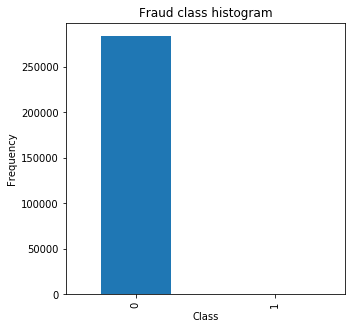

In [3]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
print(type(count_classes))
plt.figure(figsize=(5, 5))
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

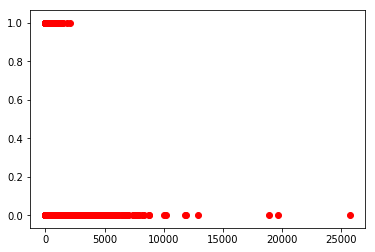

In [4]:
plt.scatter(data.Amount, data.Class, c='R')

In [5]:
from sklearn.preprocessing import StandardScaler

# 对Amount进行标准化处理
# reshape(-1, 1) 中的-1 表示大小自动识别
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

d:\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select 'x' number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# Under_sample dataset
under_sample_data = data.iloc[under_sample_indices]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print('Precentage of normal transactions: ', len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print('Precentage of fraud transactions: ', len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print('Total number of transactions in resampled data: ', len(under_sample_data))

Precentage of normal transactions:  0.5
Precentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


d:\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
d:\python\python36\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [7]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Number transactions train dataset: ', len(X_train))
print('Number transactions test dataset: ', len(X_test))
print('Total number of transactions: ', len(X_train) + len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,
                                                                                                    y_undersample, 
                                                                                                    test_size=0.3, 
                                                                                                    random_state=0)

print('')
print('Number transactions train dataset: ', len(X_train_undersample))
print('Number transactions test dataset: ', len(X_test_undersample))
print('Total number of transaction: ', len(X_train_undersample) + len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transaction:  984


d:\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# Recall = TP/(TP+FN) 召回率(查全率) 模型评估方法
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

被检索到：  
**TP：**true positive.正类判定为正类  
**FP：**false positive.负类判定为正类  
未被检索到：  
**FN：**false negative.正类判定为负类  
**TN：**false negative.负类判定为负类  

eg. 某个班级有男生80人，女生20人，共计100人。目标是找出所有女生。  
现在某人挑选出60个人，其中20人是女生，另外还错误的把40个男生也当作女生挑选出来了。  
那么：  
TP=20  
FP=40  
FN=0  
TN=40  

In [9]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(len(y_train_data), 5, shuffle=False)
    
    # Different C parameters
    c_param_range = [0.01, 0.1, 1, 10, 100]
    
    results_table = pd.DataFrame(index=range(len(c_param_range), 0), columns=['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('--------------------------------')
        print('C parameter: ', c_param)
        print('--------------------------------')
        print('')
        
        recall_accs = []
        for iteration, indices in enumerate(fold, start=1):
            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C=c_param, penalty='l1')
            
            lr.fit(x_train_data.iloc[indices[0], :], y_train_data.iloc[indices[0], :].values.ravel())
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1], :].values)
            
            recall_acc = recall_score(y_train_data.iloc[indices[1], :].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration, ': recall score = ', recall_acc)
            
        results_table.ix[j, 'Mean recall score'] = np.mean(recall_accs)
        results_table['Mean recall score'] = results_table['Mean recall score'].astype('float32')
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
        
    print(results_table['Mean recall score'])
    
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    print('*************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*************************************************')
    
    return best_c

In [10]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

--------------------------------
C parameter:  0.01
--------------------------------

Iteration  1 : recall score =  0.931506849315
Iteration  2 : recall score =  0.931506849315
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.972972972973
Iteration  5 : recall score =  0.954545454545

Mean recall score  0.95810642523

--------------------------------
C parameter:  0.1
--------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.86301369863
Iteration  3 : recall score =  0.932203389831
Iteration  4 : recall score =  0.932432432432
Iteration  5 : recall score =  0.909090909091

Mean recall score  0.897211099695

--------------------------------
C parameter:  1
--------------------------------

Iteration  1 : recall score =  0.86301369863
Iteration  2 : recall score =  0.876712328767
Iteration  3 : recall score =  0.949152542373
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.90909090909

d:\python\python36\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration  3 : recall score =  0.983050847458
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.909090909091

Mean recall score  0.915562745978

0    0.958106
1    0.897211
2    0.908783
3    0.912173
4    0.915563
Name: Mean recall score, dtype: float32
*************************************************
Best model to choose from cross validation is with C parameter =  0.01
*************************************************


In [11]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('predicted label')

Recall metric in the testing dataset:  0.931972789116


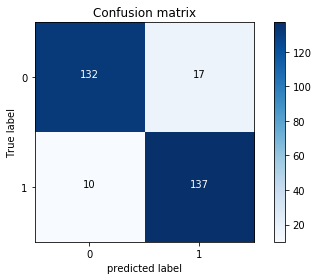

In [12]:
import itertools
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)

print('Recall metric in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 0]+cnf_matrix[1, 1]))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()

Recall metric in the testing dataset:  0.918367346939


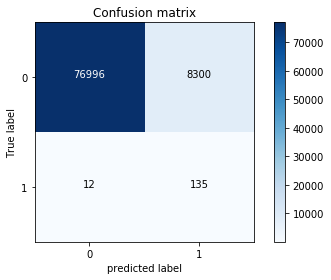

In [13]:
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Recall metric in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 0]+cnf_matrix[1, 1]))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()

In [14]:
best_c = printing_Kfold_scores(X_train, y_train)

--------------------------------
C parameter:  0.01
--------------------------------

Iteration  1 : recall score =  0.492537313433
Iteration  2 : recall score =  0.602739726027
Iteration  3 : recall score =  0.683333333333
Iteration  4 : recall score =  0.569230769231
Iteration  5 : recall score =  0.45

Mean recall score  0.559568228405

--------------------------------
C parameter:  0.1
--------------------------------



d:\python\python36\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration  1 : recall score =  0.567164179104
Iteration  2 : recall score =  0.616438356164
Iteration  3 : recall score =  0.683333333333
Iteration  4 : recall score =  0.584615384615
Iteration  5 : recall score =  0.525

Mean recall score  0.595310250644

--------------------------------
C parameter:  1
--------------------------------

Iteration  1 : recall score =  0.55223880597
Iteration  2 : recall score =  0.616438356164
Iteration  3 : recall score =  0.716666666667
Iteration  4 : recall score =  0.615384615385
Iteration  5 : recall score =  0.5625

Mean recall score  0.612645688837

--------------------------------
C parameter:  10
--------------------------------

Iteration  1 : recall score =  0.55223880597
Iteration  2 : recall score =  0.616438356164
Iteration  3 : recall score =  0.733333333333
Iteration  4 : recall score =  0.615384615385
Iteration  5 : recall score =  0.575

Mean recall score  0.61847902217

--------------------------------
C parameter:  100
-------------

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.986394557823
Recall metric in the testing dataset:  0.931972789116
Recall metric in the testing dataset:  0.87074829932
Recall metric in the testing dataset:  0.829931972789
Recall metric in the testing dataset:  0.748299319728
Recall metric in the testing dataset:  0.578231292517


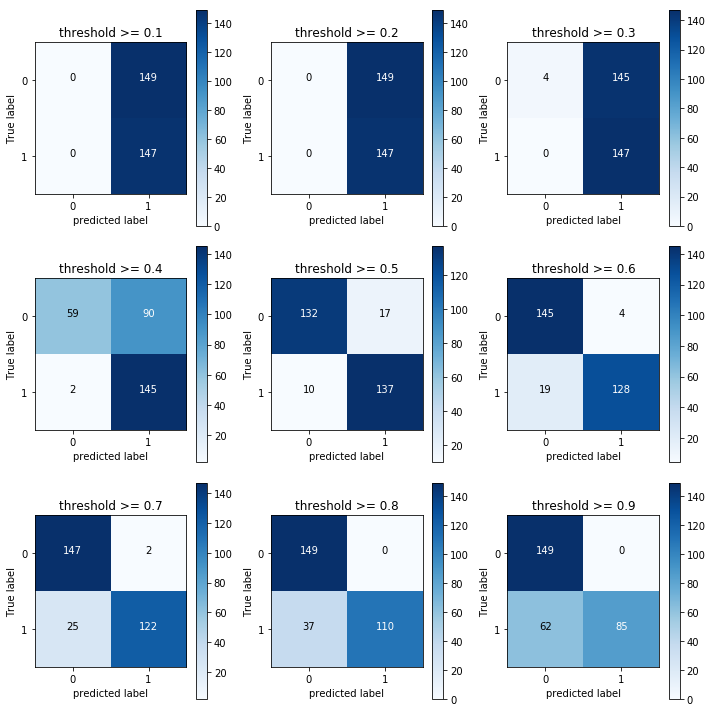

In [15]:
lr = LogisticRegression(C=0.01, penalty='l1')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample)

plt.figure(figsize=(10, 10))
j = 1
for i in np.arange(0.1, 1, 0.1):
    y_test_predictions_high_recall = y_pred_undersample_proba[:, 1] > i
    
    plt.subplot(3, 3, j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print('Recall metric in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0]))
    
    # Plot non-normalized confusion matrix
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='threshold >= %s' % i)

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [17]:
credit_cards=pd.read_csv('data/creditcard.csv')

columns = credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
feature_columns = columns.delete(len(columns) - 1)

features = credit_cards[feature_columns]
labels = credit_cards['Class']

In [18]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [19]:
oversampler=SMOTE(random_state=0)
os_features, os_labels=oversampler.fit_sample(features_train, labels_train)

In [20]:
len(os_labels[os_labels == 1])

227454

In [21]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features, os_labels)

--------------------------------
C parameter:  0.01
--------------------------------

Iteration  1 : recall score =  0.890322580645
Iteration  2 : recall score =  0.894736842105
Iteration  3 : recall score =  0.968883479031
Iteration  4 : recall score =  0.957892307185
Iteration  5 : recall score =  0.958430881173

Mean recall score  0.934053218028

--------------------------------
C parameter:  0.1
--------------------------------



d:\python\python36\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration  1 : recall score =  0.890322580645
Iteration  2 : recall score =  0.894736842105
Iteration  3 : recall score =  0.970410534469
Iteration  4 : recall score =  0.959101350831
Iteration  5 : recall score =  0.960508237984

Mean recall score  0.935015909207

--------------------------------
C parameter:  1
--------------------------------

Iteration  1 : recall score =  0.890322580645
Iteration  2 : recall score =  0.894736842105
Iteration  3 : recall score =  0.970543321899
Iteration  4 : recall score =  0.960376342313
Iteration  5 : recall score =  0.959046394302

Mean recall score  0.935005096253

--------------------------------
C parameter:  10
--------------------------------

Iteration  1 : recall score =  0.890322580645
Iteration  2 : recall score =  0.894736842105
Iteration  3 : recall score =  0.970543321899
Iteration  4 : recall score =  0.960354359701
Iteration  5 : recall score =  0.960772029325

Mean recall score  0.935345826735

--------------------------------
C 

Recall metric in the testing dataset:  0.910891089109


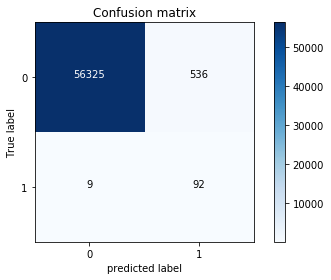

In [22]:
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(os_features, os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test, y_pred)
np.set_printoptions(precision=2)

print('Recall metric in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0]))

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, title='Confusion matrix')
plt.show()